# Text Classification with RNN

## Load the model using Kaggle API

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 78% 20.0M/25.7M [00:00<00:00, 62.7MB/s]
100% 25.7M/25.7M [00:00<00:00, 68.7MB/s]


In [ ]:
!unzip "/content/imdb-dataset-of-50k-movie-reviews.zip"

Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
data = pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
data.shape

(50000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Pre-processing Steps

### Convert Text to lowercase

In [ ]:
data['review'] = data['review'].str.lower()

In [ ]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Remove all html tags

In [ ]:
data['review'].str.contains('html').sum()

27

In [ ]:
import re
def remove_html_tags(reviews):
    return re.sub(r'<[^<]+?>', '', reviews)

data['review'] = data['review'].apply(remove_html_tags)

In [ ]:
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

### Remove URLs

In [ ]:
data['review'].str.contains('www').sum()

187

In [ ]:
import re

def remove_url(text):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', text)

In [ ]:
data['review'] = data['review'].apply(remove_url)

### Remove all the punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude  = string.punctuation

def remove_punctuation(text):
    for char in exclude:
        text = text.replace(char, '')
    return text

In [ ]:
data['review'][4]

'petter mattei\'s "love in the time of money" is a visually stunning film to watch. mr. mattei offers us a vivid portrait about human relations. this is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. this being a variation on the arthur schnitzler\'s play about the same theme, the director transfers the action to the present time new york where all these different characters meet and connect. each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. stylishly, the film has a sophisticated luxurious look. we are taken to see how these people live and the world they live in their own habitat.the only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. a big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we 

In [ ]:
data['review'] = data['review'].apply(remove_punctuation)

In [ ]:
data['review'][4]

'petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acting i

### Handling Stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

In [ ]:
def remove_stopwords(text):

    return [word for word in text.split() if word not in stop_words]

In [ ]:
data['review'][4]

'petter matteis love in the time of money is a visually stunning film to watch mr mattei offers us a vivid portrait about human relations this is a movie that seems to be telling us what money power and success do to people in the different situations we encounter this being a variation on the arthur schnitzlers play about the same theme the director transfers the action to the present time new york where all these different characters meet and connect each one is connected in one way or another to the next person but no one seems to know the previous point of contact stylishly the film has a sophisticated luxurious look we are taken to see how these people live and the world they live in their own habitatthe only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits a big city is not exactly the best place in which human relations find sincere fulfillment as one discerns is the case with most of the people we encounterthe acting i

In [ ]:
data['review'] = data['review'].apply(remove_stopwords)

In [ ]:
data['review'][4]

In [ ]:
data.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive
1,"[wonderful, little, production, filming, techn...",positive
2,"[thought, wonderful, way, spend, time, hot, su...",positive
3,"[basically, theres, family, little, boy, jake,...",negative
4,"[petter, matteis, love, time, money, visually,...",positive


In [ ]:
# Tokenize the sentences

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['review'])
word_index = tokenizer.word_index

In [ ]:
word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'even': 6,
 'would': 7,
 'time': 8,
 'really': 9,
 'see': 10,
 'story': 11,
 'much': 12,
 'well': 13,
 'get': 14,
 'great': 15,
 'bad': 16,
 'also': 17,
 'people': 18,
 'first': 19,
 'dont': 20,
 'movies': 21,
 'made': 22,
 'make': 23,
 'films': 24,
 'could': 25,
 'way': 26,
 'characters': 27,
 'think': 28,
 'watch': 29,
 'many': 30,
 'seen': 31,
 'two': 32,
 'character': 33,
 'never': 34,
 'love': 35,
 'acting': 36,
 'little': 37,
 'plot': 38,
 'best': 39,
 'know': 40,
 'show': 41,
 'life': 42,
 'ever': 43,
 'better': 44,
 'say': 45,
 'still': 46,
 'scene': 47,
 'end': 48,
 'man': 49,
 'scenes': 50,
 'something': 51,
 'go': 52,
 'back': 53,
 'real': 54,
 'im': 55,
 'watching': 56,
 'thing': 57,
 'doesnt': 58,
 'didnt': 59,
 'actors': 60,
 'years': 61,
 'actually': 62,
 'though': 63,
 'funny': 64,
 'makes': 65,
 'another': 66,
 'find': 67,
 'nothing': 68,
 'look': 69,
 'going': 70,
 'work': 71,
 'lot': 72,
 'new': 73,
 'every

In [ ]:
len(word_index)

222435

### Sequences

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert sentences to sequences of indices
sequences = tokenizer.texts_to_sequences(data['review'])

In [ ]:
sequences

In [ ]:
len(sequences)

50000

### Padding

In [ ]:
# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
padded_sequences

array([[    3,  1809,   941, ...,     0,     0,     0],
       [  277,    37,   252, ...,     0,     0,     0],
       [   96,   277,    26, ...,     0,     0,     0],
       ...,
       [ 3399,  4147, 42368, ...,     0,     0,     0],
       [   55,    70,  2856, ...,     0,     0,     0],
       [    3,  5592,   235, ...,     0,     0,     0]], dtype=int32)

In [ ]:
len(padded_sequences)

50000

In [ ]:
padded_sequences[0]

array([   3, 1809,  941, ...,    0,    0,    0], dtype=int32)

### Encoding sentiments

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Sentiment_Encoded'] = label_encoder.fit_transform(data['sentiment'])

In [ ]:
data.head(10)

,review,sentiment,Sentiment_Encoded
0,"[one, reviewers, mentioned, watching, 1, oz, e...",positive,1
1,"[wonderful, little, production, filming, techn...",positive,1
2,"[thought, wonderful, way, spend, time, hot, su...",positive,1
3,"[basically, theres, family, little, boy, jake,...",negative,0
4,"[petter, matteis, love, time, money, visually,...",positive,1
5,"[probably, alltime, favorite, movie, story, se...",positive,1
6,"[sure, would, like, see, resurrection, dated, ...",positive,1
7,"[show, amazing, fresh, innovative, idea, 70s, ...",negative,0
8,"[encouraged, positive, comments, film, looking...",negative,0
9,"[like, original, gut, wrenching, laughter, lik...",positive,1


In [ ]:
data['review'][7]

['show',
 'amazing',
 'fresh',
 'innovative',
 'idea',
 '70s',
 'first',
 'aired',
 'first',
 '7',
 '8',
 'years',
 'brilliant',
 'things',
 'dropped',
 '1990',
 'show',
 'really',
 'funny',
 'anymore',
 'continued',
 'decline',
 'complete',
 'waste',
 'time',
 'todayits',
 'truly',
 'disgraceful',
 'far',
 'show',
 'fallen',
 'writing',
 'painfully',
 'bad',
 'performances',
 'almost',
 'bad',
 'mildly',
 'entertaining',
 'respite',
 'guesthosts',
 'show',
 'probably',
 'wouldnt',
 'still',
 'air',
 'find',
 'hard',
 'believe',
 'creator',
 'handselected',
 'original',
 'cast',
 'also',
 'chose',
 'band',
 'hacks',
 'followed',
 'one',
 'recognize',
 'brilliance',
 'see',
 'fit',
 'replace',
 'mediocrity',
 'felt',
 'must',
 'give',
 '2',
 'stars',
 'respect',
 'original',
 'cast',
 'made',
 'show',
 'huge',
 'success',
 'show',
 'awful',
 'cant',
 'believe',
 'still',
 'air']

### Spliting to Train, Test

In [ ]:
x = padded_sequences
y = data['Sentiment_Encoded']

In [ ]:
print(x.shape, y.shape)

(50000, 1429) (50000,)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)

(40000, 1429) (40000,)


In [ ]:
print(X_val_test.shape, y_val_test.shape)

(10000, 1429) (10000,)


In [ ]:
print(X_val.shape, y_val.shape)

(5000, 1429) (5000,)


In [ ]:
print(X_test.shape, y_test.shape)

(5000, 1429) (5000,)


In [ ]:
X_val

array([[  257, 13247,   142, ...,     0,     0,     0],
       [18942,   392,  1086, ...,     0,     0,     0],
       [    4,    41,   127, ...,     0,     0,     0],
       ...,
       [   78,   260,    12, ...,     0,     0,     0],
       [  133,  2205,     3, ...,     0,     0,     0],
       [ 1522,  1464,    23, ...,     0,     0,     0]], dtype=int32)

In [ ]:
y_val

47374    0
48216    0
45929    1
48715    0
18849    0
        ..
49939    0
6420     0
48421    1
26037    1
31247    0
Name: Sentiment_Encoded, Length: 5000, dtype: int64

### LSTM MODEL

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

Batch Size: 32 Train Image: 40,000 Steps_per_epoch = 40,000/32 = 1250

In [ ]:
# Fit the model
RNN = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 311s 242ms/step - loss: 0.4484 - accuracy: 0.7545 - val_loss: 0.2865 - val_accuracy: 0.8736
Epoch 2/10
1250/1250 [==============================] - 223s 178ms/step - loss: 0.2034 - accuracy: 0.9277 - val_loss: 0.2733 - val_accuracy: 0.8904
Epoch 3/10
1250/1250 [==============================] - 208s 166ms/step - loss: 0.1095 - accuracy: 0.9653 - val_loss: 0.3197 - val_accuracy: 0.8880
Epoch 4/10
1250/1250 [==============================] - 202s 162ms/step - loss: 0.0589 - accuracy: 0.9852 - val_loss: 0.4075 - val_accuracy: 0.8788
Epoch 5/10
1250/1250 [==============================] - 197s 158ms/step - loss: 0.0351 - accuracy: 0.9914 - val_loss: 0.5197 - val_accuracy: 0.8684
Epoch 6/10
1250/1250 [==============================] - 198s 159ms/step - loss: 0.0229 - accuracy: 0.9947 - val_loss: 0.5575 - val_accuracy: 0.8786
Epoch 7/10
1250/1250 [==============================] - 198s 158ms/step - loss: 0.0130 - accuracy: 0.9971 - val_

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = RNN.model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

157/157 [==============================] - 11s 72ms/step - loss: 0.7045 - accuracy: 0.8736
Test Loss: 0.7044678926467896
Test Accuracy: 0.8736000061035156


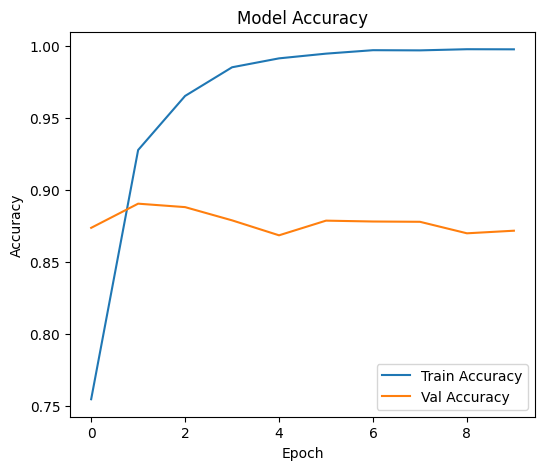

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(6, 5))
plt.plot(RNN.history['accuracy'], label='Train Accuracy')
plt.plot(RNN.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

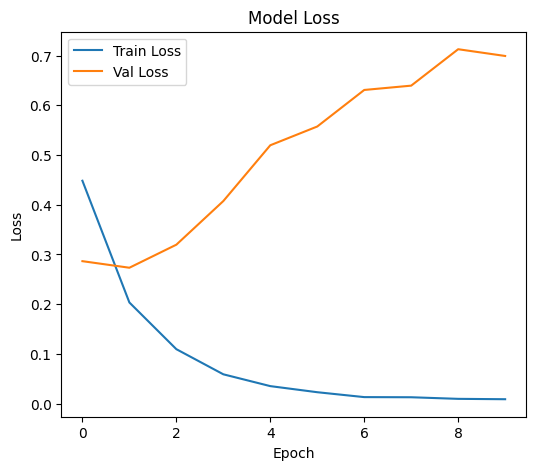

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(6, 5))
plt.plot(RNN.history['loss'], label='Train Loss')
plt.plot(RNN.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
RNN.model.save('RNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model Evaluation

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('RNN.h5')

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['review'])

In [ ]:
sample_review = "i didn't like the movie"

In [ ]:
sample_sequence = tokenizer.texts_to_sequences([sample_review])
padded_sequence = pad_sequences(sample_sequence, maxlen=1429, padding='post')

In [ ]:
sample_sequence

[[10, 154, 37, 1, 17]]

In [ ]:
padded_sequence

array([[ 10, 154,  37, ...,   0,   0,   0]], dtype=int32)

In [ ]:
prediction = model.predict(padded_sequence)
predicted_sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"

print("Predicted Sentiment:", predicted_sentiment, prediction)

1/1 [==============================] - 0s 182ms/step
Predicted Sentiment: Negative [[-2.1387181]]


In [ ]:
sample_review = "The movie was fantastic. I liked the movie"

In [ ]:
sample_sequence = tokenizer.texts_to_sequences([sample_review])
padded_sequence = pad_sequences(sample_sequence, maxlen=1429, padding='post')

In [ ]:
prediction = model.predict(padded_sequence)
predicted_sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"

print("Predicted Sentiment:", predicted_sentiment, prediction)

1/1 [==============================] - 0s 184ms/step
Predicted Sentiment: Positive [[1.4968672]]
